In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker
from IPython.display import Audio
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 200)

In [2]:
#Billboard Top 100 By Week from 1958 to 2021
bb100 = pd.read_csv('Hot Stuff.csv')

In [3]:
#First & Last 2 entries by Week/Year
bb100['WeekID'] = pd.to_datetime(bb100['WeekID'])

In [4]:
#Features
features = pd.read_excel('Hot 100 Audio Features.xlsx')

In [5]:
#Selecting key features for both dataframes:

bb100_keep = ['WeekID','SongID', 'Performer']

feat_keep = ['SongID','danceability', 'energy', 'speechiness', 'acousticness', 
             'instrumentalness', 'liveness', 'valence']

In [6]:
bb100_feat = pd.merge(bb100[bb100_keep], features[feat_keep], on='SongID', how='left')

In [7]:
artists = bb100_feat.groupby('Performer').mean()
artists

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
Performer,,,,,,,
"""Groove"" Holmes",0.553000,0.487000,0.032400,0.783000,0.876000,0.292000,0.524000
"""Little"" Jimmy Dickens",0.660000,0.801000,0.115000,0.738000,0.000010,0.627000,0.867000
"""Pookie"" Hudson",NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Weird Al"" Yankovic",0.731308,0.669165,0.087407,0.132022,0.000216,0.140924,0.776681
'N Sync,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
will.i.am & Nicki Minaj,0.854000,0.667000,0.059800,0.070500,0.000008,0.119000,0.686000
will.i.am Featuring Justin Bieber,0.797000,0.608000,0.058300,0.001120,0.000077,0.074800,0.403000
will.i.am Featuring Mick Jagger & Jennifer Lopez,0.586000,0.712000,0.096900,0.104000,0.000006,0.037700,0.450000


In [8]:
Halsey = artists[artists.index=='Halsey']
Halsey

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
Performer,,,,,,,
Halsey,0.670697,0.577432,0.05721,0.182748,0.000008,0.147645,0.478192


In [9]:
df=Halsey
values = df.iloc[0].values.flatten().tolist()
values

[0.6706965811965813,
 0.577431623931624,
 0.05720982905982906,
 0.1827482905982906,
 8.226239316239315e-06,
 0.14764529914529914,
 0.4781923076923077]

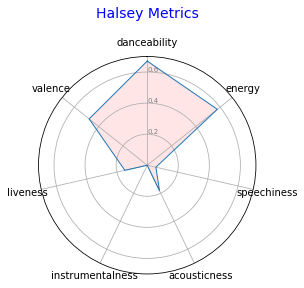

In [10]:
from math import pi
 
# number of variable
categories=list(df)[0:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2,0.4,0.6, 0.8], ["0.2","0.4","0.6","0.8"], color="grey", size=7)
plt.ylim(0,0.7)

# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.iloc[0].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Metrics")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Ind2
#values=df.loc[1].drop('Group').values.flatten().tolist()
#values += values[:1]
#ax.plot(angles, values, linewidth=1, linestyle='solid', label="The Rest")
#ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
#plt.legend(loc='lower left', bbox_to_anchor=(0.9, 0.08))

# Show the graph
plt.title('Halsey Metrics', color='b', pad=20, fontsize=14)
plt.show()

In [11]:
ideal = bb100_feat.groupby(pd.Grouper(key='WeekID', axis=0, freq='1Y')).mean()
ideal

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
WeekID,,,,,,,
1958-12-31,0.545860,0.471431,0.051397,0.670536,0.062691,0.193292,0.675069
1959-12-31,0.528111,0.482844,0.057691,0.674084,0.070608,0.192840,0.661094
1960-12-31,0.516852,0.456821,0.045528,0.666800,0.070480,0.205267,0.653143
1961-12-31,0.531123,0.478718,0.052219,0.653479,0.087808,0.218387,0.666775
1962-12-31,0.542766,0.477447,0.057662,0.638669,0.071893,0.213591,0.670719
...,...,...,...,...,...,...,...
2017-12-31,0.682885,0.641847,0.116469,0.168601,0.004120,0.146380,0.503560
2018-12-31,0.687011,0.636133,0.125148,0.179402,0.003884,0.167008,0.454047
2019-12-31,0.693093,0.623126,0.125736,0.223738,0.007480,0.162145,0.499985


In [12]:
df2 = ideal.iloc[[-1]]
df2

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
WeekID,,,,,,,
2021-12-31,0.651664,0.593304,0.107856,0.289071,0.00317,0.160534,0.498986


In [13]:
Hal_Ideal = pd.concat([df2, df])
Hal_Ideal

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
2021-12-31 00:00:00,0.651664,0.593304,0.107856,0.289071,0.003170,0.160534,0.498986
Halsey,0.670697,0.577432,0.057210,0.182748,0.000008,0.147645,0.478192


In [14]:
diff = Hal_Ideal.iloc[0] - Hal_Ideal.iloc[1]
diff.abs().sum()

0.22871652917569113

In [15]:
df = Hal_Ideal

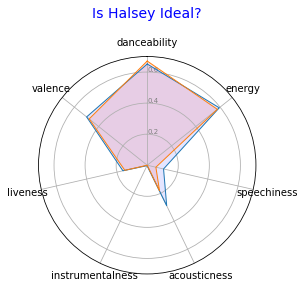

In [16]:
from math import pi
 
# number of variable
categories=list(df)[0:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2,0.4,0.6, 0.8], ["0.2","0.4","0.6","0.8"], color="grey", size=7)
plt.ylim(0,0.7)

# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.iloc[0].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Ideal Metrics")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.iloc[1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Halsey Metrics")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
#plt.legend(loc='lower left', bbox_to_anchor=(0.9, 0.08))

# Show the graph
plt.title('Is Halsey Ideal?', color='b', pad=20, fontsize=14)
plt.show()